<a href="https://colab.research.google.com/github/Wenypb/Simulacion/blob/main/Montecarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Método de Montecarlo**

### **Librerías**

In [47]:
import random as rnd
import math
import numpy as np
import matplotlib.pyplot as plt

## ***Media Muestral (crudo)***

Si se desea calcular:

$\int_{a}^{b} f(x) dx$

Y se tiene la siguiente función de densidad de una distribucion uniforme

$ h(x)= \frac{1}{b-a}$

Por definición

$E( f(x) ) = \int_{a}^{b} f(x) h(x) dx$

Sustituyendo el valor de la funcion de densidad en la ecuación anterior

$E( f(x) ) = \int_{a}^{b} f(x) \frac{1}{b-a} dx \longrightarrow$ $E( f(x) ) = \frac{1}{b-a} \int_{a}^{b} f(x) dx $

Despejando la integral a calcular

$ \int_{a}^{b} f(x) dx = E( f(x) ) ( b-a ) $

Por la ley de los grandes números

$E( f(x) ) \approx \frac{1}{n} \sum_{i=1}^{n} f( x_{i} )$

Cada $x_{i}$ es un número aleatorio elegido en $[a,b]$

Entonces

$ \int_{a}^{b} f(x) dx = \approx \frac{b-a}{n} \sum_{i=1}^{n} f( x_{i} ) $

### **Estimación**


$  \int_{0}^{1} Cos (\frac{\pi x}{2}) dx$  


Donde tenemos

$f(x) = Cos (\frac{\pi x}{2}) \hspace{1cm} a = 0 \hspace{1cm} b = 1 $

### **Código para calcular la aproximación**

In [48]:
#Valores de los límites de la integral
a=0
b=1
# Determinar n
n = 1000
# Listas vacias para guardar resultados
X = []
Y = []
for i in range(n):
  # Generar Xi con i = 1,2,...,n
  Xi= rnd.random()
  # Agregar Xi a la lista X
  X.append(Xi)
  # Hacer Yi = Cos((pi*Xi)/2)
  Yi= math.cos((math.pi*Xi)/2)
  # Agregar Yi a la lista Y
  Y.append(Yi)
# Calcular la suma de lista Y que contiene los f(xi)
suma=sum(Y)
# Calcular la aproximacion de la integral
aproximacion = ((b-a)/n)*suma
# Imprimir el valor de la aproximacion
print("El valor aproximado de la integral es",aproximacion)

El valor aproximado de la integral es 0.637573052711961


## **Acierto y error**

El método de acierto y error consiste en lanzar aleatoriamente un dardo en un cuadrado y si este cae debajo de la curva morada se considera éxito pero si por el contrario cae por encima de la cruva se considera como fracaso.

### **Muestra del experimento del dardo**

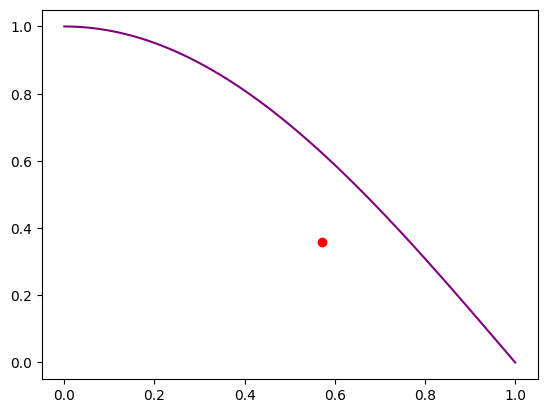

In [49]:
# Gráficar la curva de la funcion
    # Generar 100 valores de x entre [0,1]
x=np.linspace(0,1,100)
    # Calcular el valor de y para cada x y hace la gráfica
plt.plot(x,np.cos((math.pi*x)/2),color="purple")
# Gráficar el punto donde caera el dardo
    # Generar u1 que es la posición en x
u1=rnd.random()
    # Generar u2 que es la posición en y
u2=rnd.random()
    # Hace la gráfica
plt.scatter(u1,u2,color="red")
plt.show()

### **Aproximación con dardos**

Este experimento se realiza N veces, cuando  se concluyen todos los lanzamientos se hace el conteo de los dardos que resultaron un éxito y se hace la aproximación dividiendo el número de éxitos entre N, que es el número de dardos que se lanzarón.

$  \int_{0}^{1} Cos (\frac{\pi x}{2}) dx \approx  
\frac{\# \hspace{0.5cm} exitos}{ total \hspace{0.2cm} de \hspace{0.2cm} dardos \hspace{0.2cm} lanzados} $  

 **Función que calcula el número de exitos con N dardos lanzados y da su gráfica**

In [50]:
def Numero_exitos(intentos):
  # GRAFICAR LA CURVA DE LA FUNCION
    # Generar 100 valores de x entre [0,1]
  x=np.linspace(0,1,100)
    # Calcular el valor de y para cada x y hace la gráfica
  plt.plot(x,np.cos((math.pi*x)/2),color="blue")

  # CICLO PARA REPETIR EL EXPERIMENTO N VECES
    # n -> NUMERO DE EXITOS
  n=0
  for i in range(intentos):
    # u1 que es la posición en x
    u1=rnd.random()
    # u2 que es la posición en y
    u2=rnd.random()
    #CONDICION PARA EL EXITO
    if u2<=np.cos((math.pi*u1)/2):
      plt.scatter(u1,u2,color="green")
      n=n+1
    else:
      plt.scatter(u1,u2,color="red")
  return n

**Cálculo de la aproximación**

La aproximación con 20 intentos es 0.8


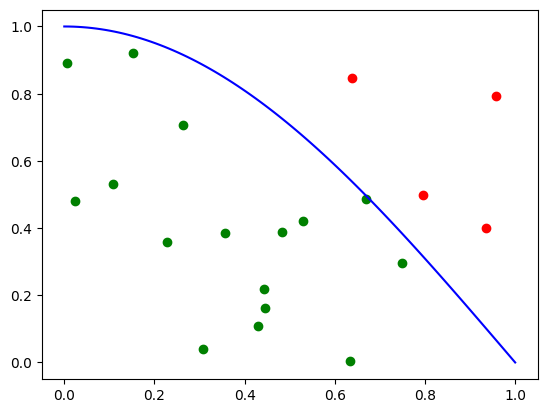

In [51]:
# N-> Número de dardos a lanzar
N=20
# exitos -> Número de exitos obtenidos con N intentos
exitos=Numero_exitos(N)
# Aproximacion -> Valor obtenido de dividir el numero de exitos entre el numero de dardos lanzados
Aproximacion =(exitos)/N
print("La aproximación con",N,"intentos es",Aproximacion)

**Función que calcula la aproximacion con N dardos lanzados**

In [52]:
def Aproximacion(intentos):
  # CICLO PARA REPETIR EL EXPERIMENTO N VECES
    # n -> NUMERO DE EXITOS
  n=0
  for i in range(intentos):
    # u1 que es la posición en x
    u1=rnd.random()
    # u2 que es la posición en y
    u2=rnd.random()
    #CONDICION PARA EL EXITO
    if u2<=np.cos((math.pi*u1)/2):
      n=n+1
    else:
      n=n
    # Calculo de la aproximación
    aproximacion =(n)/intentos
  return aproximacion

**Número de repeticiones para lograr una mejor aproximación del resultado**

Para calcular una mejor aproximación hay que repetir r veces el calculo de la aproximacion y obtener el valor esperado de estas r repeticiones con $r = 1,2,3,...,r$

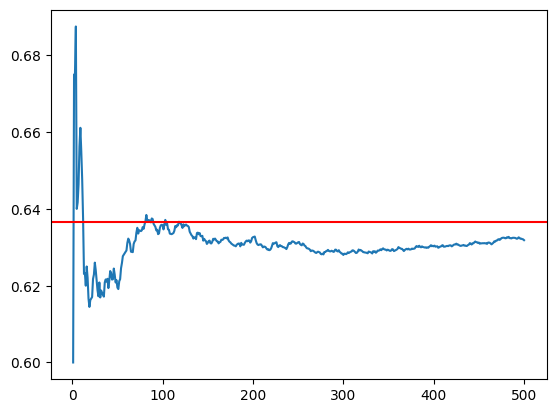

In [53]:
# suma -> Variable que guarda la suma de los valores de la aproximacion en cada repetición
suma=0
# repeticiones -> Lista que guarda el número de repeticiones
repeticiones=[]
# promedios -> Lista que guarda los promedios para cada repetición
promedios=[]
# Ciclo que realiza las r repeticiones
for i in range(500):
  # intentos -> Numero de intentos para calcular cada aproximacion
  intentos=40
  # Uso de la funcion Aproximacion
  aproximacion=Aproximacion(intentos)
  # Se suma la nueva aproximacion calculada
  suma=suma+aproximacion
  # Se calcula el promedio
  promedio=suma/(i+1)
  # Se agrega a la lista de repeticiones la repeticion que se hace al momento
  repeticiones.append(i+1)
  # Se agrega a la lista de promedios el rpomedio obtenido
  promedios.append(promedio)
# Grafica de los resultados con repeticiones en el eje x y promedios en el eje y
plt.plot(repeticiones,promedios)
# Se traza la linea del valor real de la integral
plt.axhline(2/np.pi,color="red")

## **Muestreo de importancia**

Proponer una funcion g(x) que se asemeje a f(x)

(array([201., 205., 203., 210., 188., 188., 203., 186., 197., 189., 192.,
        203., 179., 189., 150., 193., 179., 165., 160., 177., 158., 147.,
        152., 181., 147., 139., 124., 138., 136., 134., 150., 129., 117.,
        127.,  94., 114.,  79.,  97.,  96.,  74.,  82.,  66.,  70.,  45.,
         41.,  36.,  24.,  26.,  11.,   5.]),
 array([1.44006612e-04, 1.99692959e-02, 3.97945853e-02, 5.96198746e-02,
        7.94451639e-02, 9.92704532e-02, 1.19095743e-01, 1.38921032e-01,
        1.58746321e-01, 1.78571611e-01, 1.98396900e-01, 2.18222189e-01,
        2.38047478e-01, 2.57872768e-01, 2.77698057e-01, 2.97523346e-01,
        3.17348636e-01, 3.37173925e-01, 3.56999214e-01, 3.76824504e-01,
        3.96649793e-01, 4.16475082e-01, 4.36300372e-01, 4.56125661e-01,
        4.75950950e-01, 4.95776240e-01, 5.15601529e-01, 5.35426818e-01,
        5.55252108e-01, 5.75077397e-01, 5.94902686e-01, 6.14727976e-01,
        6.34553265e-01, 6.54378554e-01, 6.74203844e-01, 6.94029133e-01,
        7.

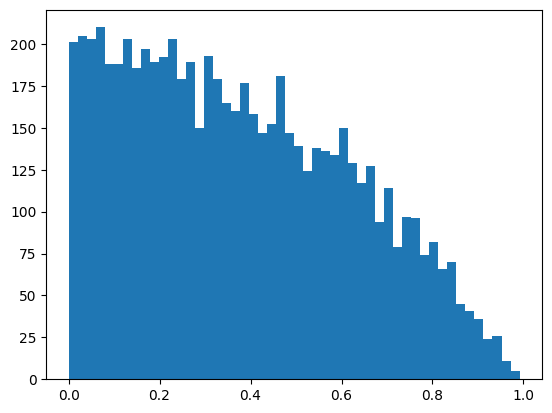

In [54]:
# g(x) = 1.5 - 1.5x
# h(x) = 1.5
# X -> Lista de x aceptadas
X=[]
for i in range(10000):
  #Generamos un x al azar [0,1]
  x= rnd.random()
  #Calculamos la probabilidad de aceptar a x -> g(x)/h(x)
  p = (1.5 - 1.5*(x**2))/1.5
  #Generamos Ux
  Ux = rnd.random()
  if Ux<=p:
    X.append(x)
plt.hist(X,bins=50)